In [2]:
from main import *
from visualization import *
from useful_functions import *

import matplotlib as mpl
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['font.size'] = 6
mpl.rcParams['font.family'] = 'Arial'

# Loading required data to make Figure 1

In [4]:
top_directory = '/media/anleg84/One Touch/Data/Main/'
atlas_path = '/home/anleg84/Documents/Atlas/Mapzebrain/'

datasets = get_datasets(top_directory, ['920nm', 'wholebrain'])
excluded = np.load('Results/excluded_regions.npy')

atlas = MapzebrainAtlas(atlas_path)
acronyms = list(np.delete(atlas.acronyms, excluded))

folder = datasets[11]
timeseries = np.delete(np.load(folder + 'region_series_dff.npy'), excluded, axis=0)
data = load_data(folder)

palette = generate_n_colors(11, saturation=65, value=90)
palette *= 6

projection_top = np.load('Results/projection_regions_top.npy')
projection_side = np.load('Results/projection_regions_side.npy')

FC = np.load('Results/FC_matrix.npy')
FC_bilat = np.tile(FC, (2, 2))
region_centroids = np.concatenate([atlas.regionCentroids['left'], atlas.regionCentroids['right']], axis=0)
region_centroids[:, 1] = 974 - region_centroids[:, 1]
region_centroids = np.delete(region_centroids, np.concatenate([excluded, np.array(excluded) + 70]), axis=0)

fish_ids = np.load('Data/figure1_fish_ids.npy')
fish_correlations = np.load('Data/figure1_fish_correlations.npy')

mean_similarity = np.load('Results/figure1_mean_similarity.npy')
similarity_same = np.load('Results/figure1_similarity_same.npy')
similarity_different = np.load('Results/figure1_similarity_different.npy')

# Making layout

In [5]:
colormap = 'Reds'
ypad = 3

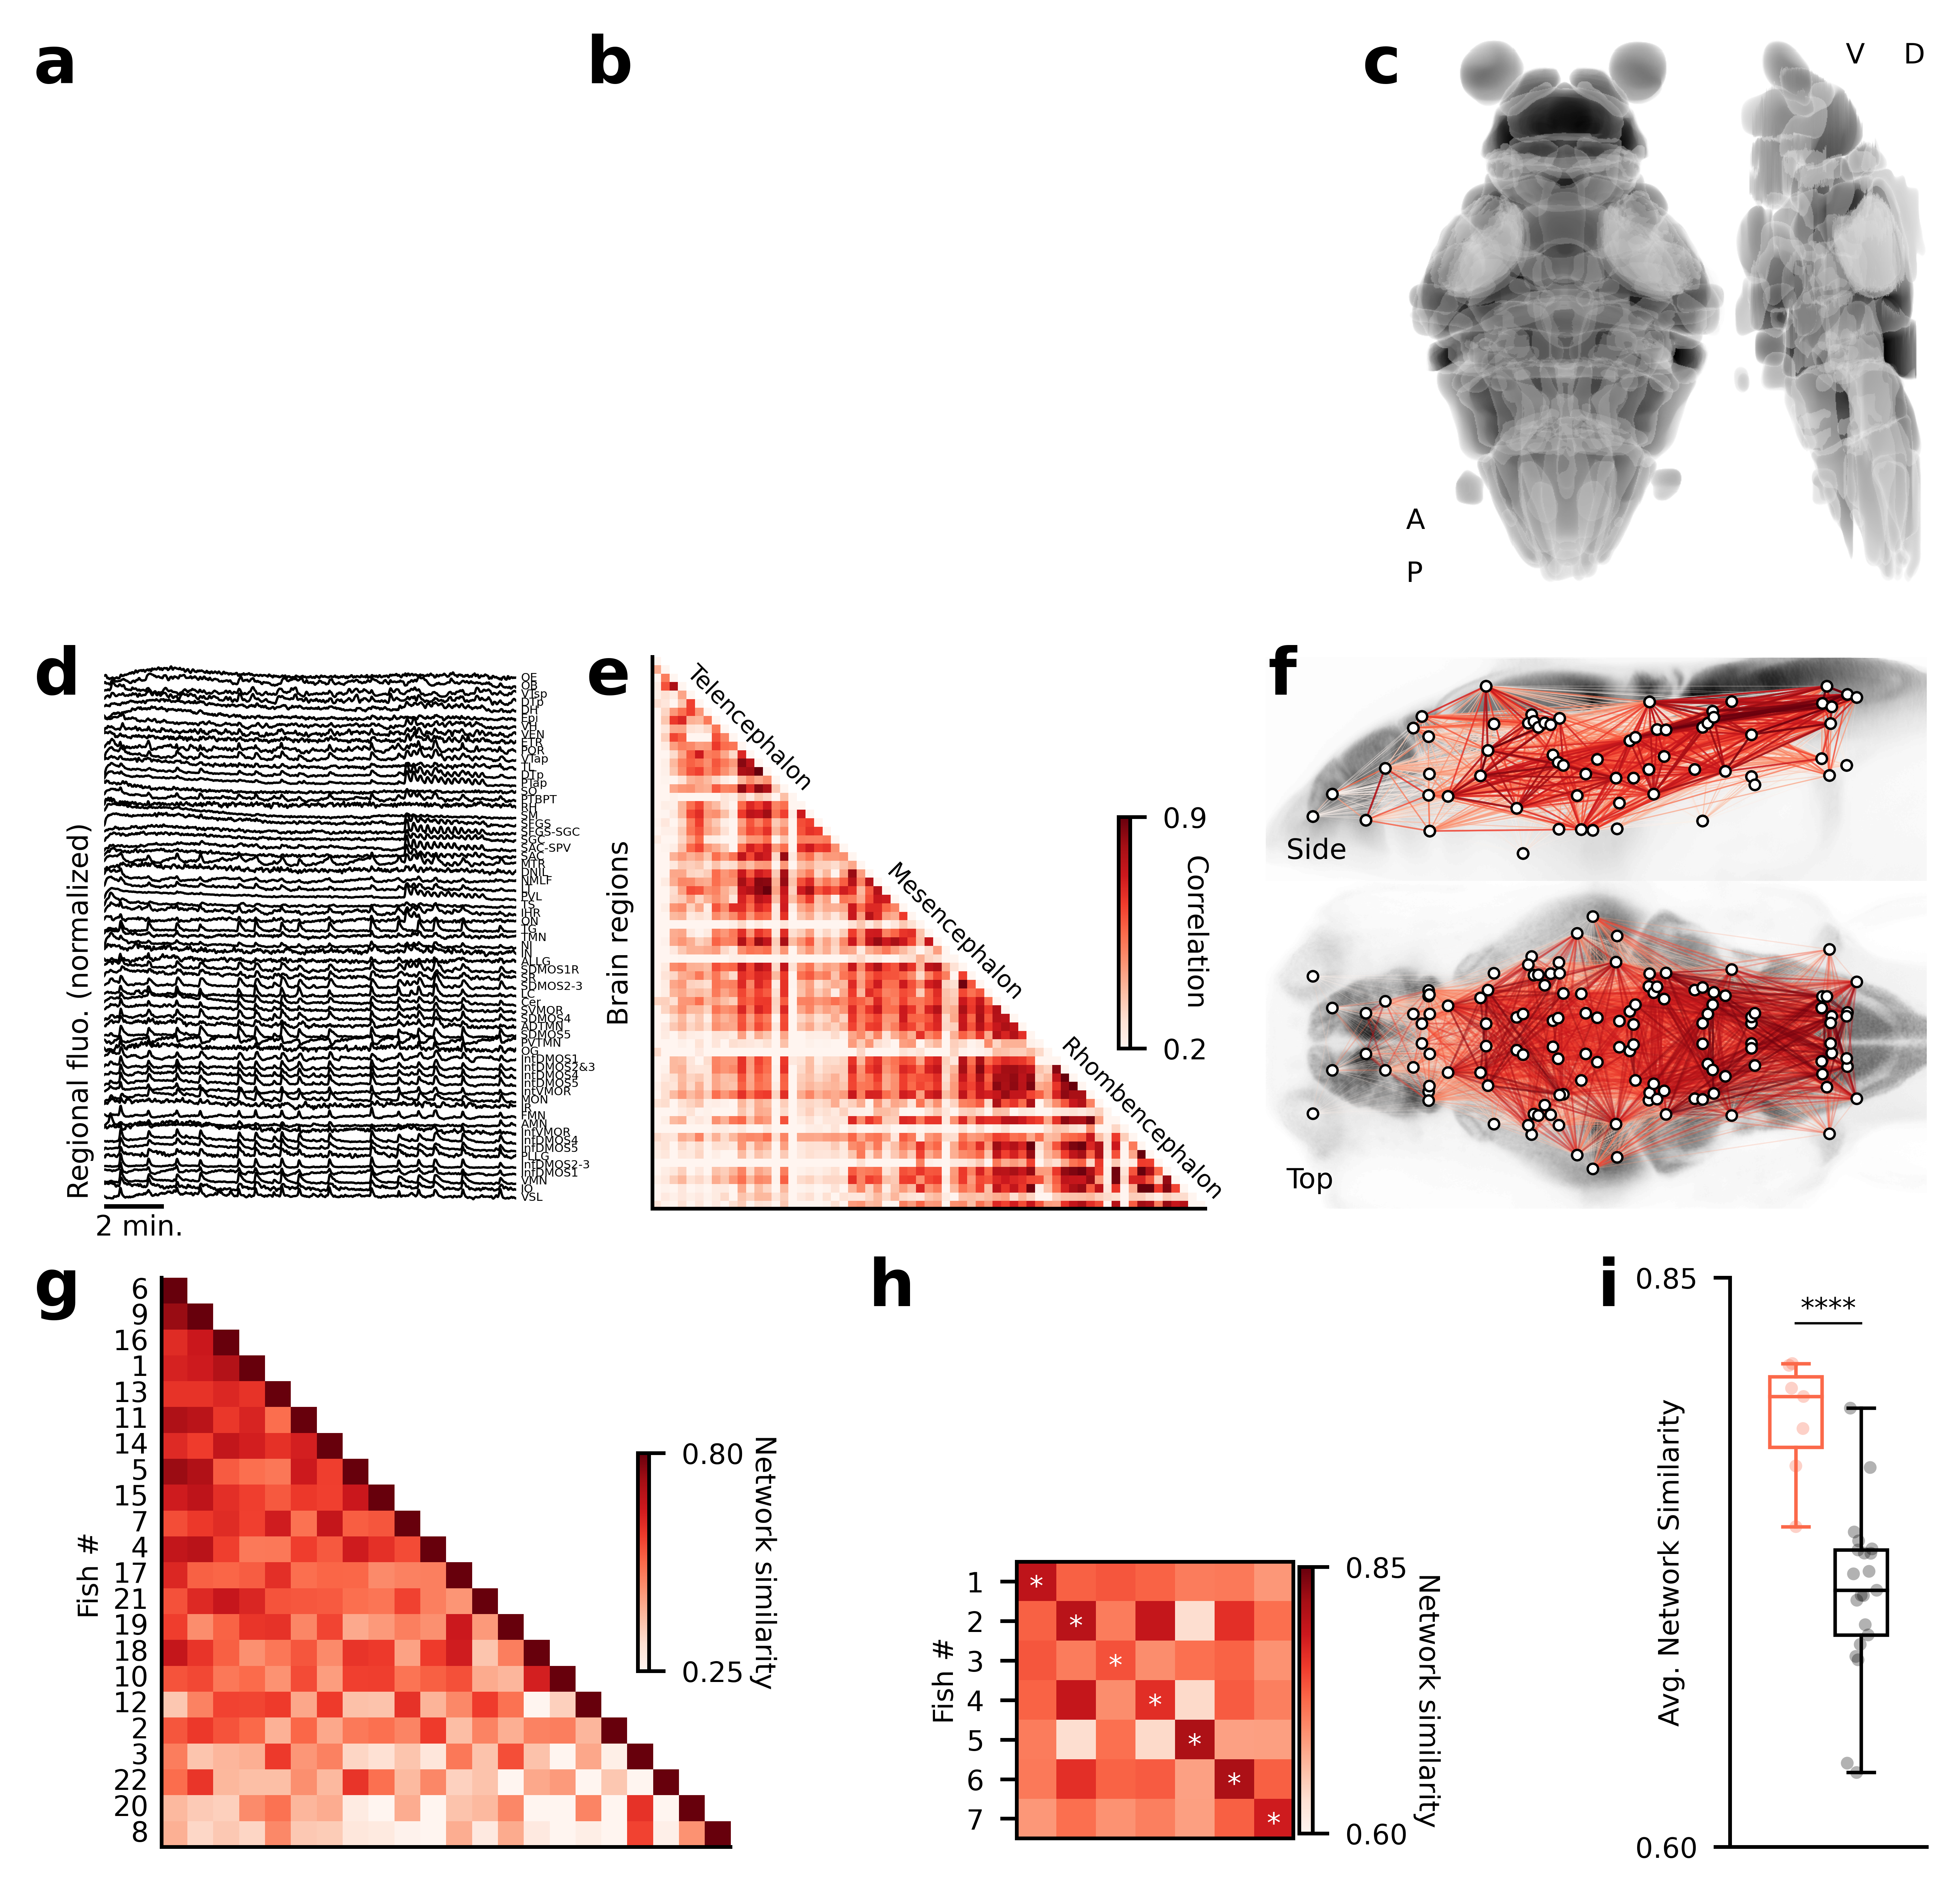

In [14]:
fig = plt.figure(figsize=(7, 7), dpi=900)

# -------------- Setting up grid -----------------

gs = gridspec.GridSpec(100 + 2 * ypad, 110, figure=fig, hspace=1000)  # Adjust hspace for padding

row_ids = [33, 66]
ids1 = [30, 70, 88]
ids2 = [25, 60]

# --------------- First row ----------------------

# a) panel
ax = fig.add_subplot(gs[:row_ids[0], :30])
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

# b) panel
ax = fig.add_subplot(gs[:row_ids[0], 33:73])
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')

# c) panel (left)
ax = fig.add_subplot(gs[:row_ids[0], 78:98])
ax.imshow(projection_top, cmap='binary', aspect='auto')
centroids = data['centroids_atlas']
labels = np.delete(np.copy(data['region_labels']), excluded, axis=1)
#for i in range(labels.shape[1]):
#    plt.scatter(centroids[labels[:, i] != 0, 0], centroids[labels[:, i] != 0, 1], marker='.', color=palette[i], edgecolor='none', alpha=0.15, s=4)
ax.set_xlim([60, 500])
ax.set_ylim([880, 50])
ax.text(70, 800, 'A', va='bottom')
ax.text(70, 880, 'P', va='bottom')
plt.axis('off')

# c) panel (right)
ax = fig.add_subplot(gs[:row_ids[0], -12:])
ax.imshow(np.rot90(projection_side, k=3), cmap='binary', aspect='auto')
centroids = data['centroids_atlas']
labels = np.delete(np.copy(data['region_labels']), excluded, axis=1)
#for i in range(labels.shape[1]):
#    plt.scatter(359 - centroids[labels[:, i] != 0, 2], centroids[labels[:, i] != 0, 1], marker='.', color=palette[i], edgecolor='none', alpha=0.075, s=4)
ax.set_xlim([20, 360])
ax.set_ylim([880, 50])
ax.text(220, 100, 'V', va='bottom')
ax.text(320, 100, 'D', va='bottom')
plt.axis('off')

# --------------- Second row ------------------

# d) panel
ax = fig.add_subplot(gs[row_ids[0]+ypad:row_ids[1]+ypad, :25])
z = 0
for i in range(timeseries.shape[0]):
    ax.plot(gaussian_filter1d(normalize(timeseries[i]), 1) - 0.5 * z, color='black', linewidth=0.5)
    z += 1
z = 0
for i in range(timeseries.shape[0]):
    ax.text(timeseries.shape[1] + 10, - 0.5 * z, acronyms[i], fontsize=2.5)
    z += 1
plt.xlim([0, timeseries.shape[1]])
plt.ylim([-32.5, 1.5])
plt.plot([0, 120 * 0.99], [-32.5, -32.5], color='black', linewidth=2)
plt.axis('off')

# e) panel
ax = fig.add_subplot(gs[row_ids[0]+ypad:row_ids[1]+ypad, 27:62])
ax.spines[['top', 'right']].set_visible(False)
triangle = np.triu_indices(65, 1)
FC[triangle] = np.nan
cax = plt.imshow(FC, cmap=colormap, vmin=0.2, vmax=0.9)
cbar = plt.colorbar(cax, ax=ax, fraction=0.02, pad=-0.15)
cbar.set_ticks([0.2, 0.9])
cbar.set_label('Correlation', rotation=270, labelpad=0)
ylim = plt.ylim()
plt.xticks([])
plt.yticks([])
plt.ylim([64.4, -0.5])
fontsize = 5
shift = 3
plt.text(shift, 0, 'Telencephalon', fontsize=fontsize, rotation=-45, ha='left', va='top')
plt.text((64/2) + shift, 64 / 2, 'Mesencephalon', fontsize=fontsize, rotation=-45, ha='center', va='center')
plt.text(64+shift, 64, 'Rhombencephalon', fontsize=fontsize, rotation=-45, ha='right', va='bottom')
plt.ylabel('Brain regions')

# f) panel (top)
ax = fig.add_subplot(gs[row_ids[0]+ypad:row_ids[1]+ypad-18, -40:])
percentile = 50
plt.imshow(atlas.XZprojection, cmap='binary', vmin=0, aspect='auto')
draw_graph(ax, FC_bilat, np.delete(region_centroids, 0, axis=1), percentile=0, s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.3, edge_vmax=0.9,
          linewidth=0.5, node_edgewidth=0.5)
ax.set_xlim([50, 850])
ax.set_ylim([359, 0])
plt.text(75, 300, 'Side')
plt.axis('off')

# f) panel (bottom)
ax = fig.add_subplot(gs[row_ids[1]+ypad-20:row_ids[1]+ypad, -40:])
percentile = 50
plt.imshow(np.rot90(atlas.XYprojection), cmap='binary', aspect='auto')
c = np.stack([region_centroids[:, 1], 597 - region_centroids[:, 0]], axis=1)
draw_graph(ax, FC_bilat, c, percentile=0, s=5, edge_cmap=colormap, alpha=0.5, edge_vmin=0.3, edge_vmax=0.9, linewidth=0.5,
          node_edgewidth=0.5)
ax.set_xlim([50, 850])
ax.set_ylim([550, 80])
plt.text(75, 520, 'Top')
plt.axis('off')

# --------------- Third row -------------------

# g) panel
ax = fig.add_subplot(gs[row_ids[1]+2*ypad:, :33])
fc = np.copy(fish_correlations)
fc[np.triu_indices(fc.shape[0], 1)] = np.nan
cax = ax.imshow(fc, cmap=colormap, vmin=0.25, vmax=0.8)
for i in range(len(fish_ids)):
    plt.text(-1, i, fish_ids[i].split(' ')[1], ha='right', va='center', fontsize=6)
cbar = plt.colorbar(cax, ax=ax, fraction=0.02, pad=-0.17)
cbar.set_ticks([0.25, 0.8])
cbar.set_label('Network similarity', rotation=270, labelpad=7)

plt.xticks([])
plt.yticks([])
ax.spines[['top', 'right']].set_visible(False)
plt.text(-3.25, 22/2, 'Fish #', fontsize=6, rotation=90, ha='center', va='center')

# h) panel
x = 55
ax = fig.add_subplot(gs[82+2*ypad:, x:x + 18])
cax = plt.imshow(mean_similarity, cmap=colormap, vmax=0.85, vmin=0.6, extent=[0.5,7.5,7.5,0.5])
cbar = plt.colorbar(cax, ax=ax, fraction=0.045, pad=0.02)
cbar.set_ticks([0.6, 0.85])
cbar.set_label('Network similarity', rotation=270, labelpad=7)
plt.xticks([])
plt.yticks([1,2,3,4,5,6,7])
plt.text(-1.3, 7/2, 'Fish #', fontsize=6, rotation=90, ha='center', va='center')
for i in range(mean_similarity.shape[0]):
    plt.text(i+1, i+1.15, '*', va='center', ha='center', color='white')

# i) panel
ax = fig.add_subplot(gs[row_ids[-1]+2*ypad:, 98:])
cmap = plt.cm.get_cmap(colormap)
middle_color = cmap(0.5)
color = mpl.colors.to_rgb(middle_color)
color1, color2 = color, 'black'
plt.scatter(np.random.normal(0.5, 0.05, len(similarity_same)), similarity_same, color=color1, edgecolor='None', alpha=0.3,
           s=7.5, linewidths=1)
bp = ax.boxplot(similarity_same, positions=[0.5], patch_artist=True, widths=0.4)
set_boxplot_color(bp, color1, marker='None', linewidth=0.75)
plt.scatter(np.random.normal(1.0, 0.05, len(similarity_different)), similarity_different, color=color2, edgecolor='None', alpha=0.3,
           s=7.5, linewidths=1)
bp = ax.boxplot(similarity_different, positions=[1.0], patch_artist=True, widths=0.4, whis=[0, 100])
set_boxplot_color(bp, color2, marker='None', linewidth=0.75)
ax.spines[['top', 'right']].set_visible(False)
plt.xticks([])
plt.yticks([0.6, 0.85])
plt.text(-0.45, 0.725, 'Avg. Network Similarity', fontsize=6, rotation=90, ha='center', va='center')
plt.ylim([0.6, 0.85])
plt.plot([0.5, 1], [0.83, 0.83], linewidth=0.5, color='black')
plt.text(0.75, 0.83, '****', ha='center', va='bottom')


# -------------------- Panel labeling --------------------

fig.text(0.095, 0.86, 'a', fontsize=14, weight='bold')
fig.text(0.33, 0.86, 'b', fontsize=14, weight='bold')
fig.text(0.66, 0.86, 'c', fontsize=14, weight='bold')
fig.text(0.095, 0.6, 'd', fontsize=14, weight='bold')
fig.text(0.33, 0.6, 'e', fontsize=14, weight='bold')
fig.text(0.62, 0.6, 'f', fontsize=14, weight='bold')
fig.text(0.095, 0.34, 'g', fontsize=14, weight='bold')
fig.text(0.45, 0.34, 'h', fontsize=14, weight='bold')
fig.text(0.76, 0.34, 'i', fontsize=14, weight='bold')

# -------------------- Other text ---------------------

fig.text(0.14, 0.37, '2 min.', ha='center')
fig.text(0.115, 0.388, 'Regional fluo. (normalized)', ha='center', rotation=90)

# -------------------- Exporting ----------------------

plt.savefig('/home/anleg84/Documents/Figures/PaperNetworks2024/figure1_incomplete.svg', bbox_inches='tight', pad_inches=0.01)

plt.show()